In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [8]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_minus'] = x_train['Fare'].fillna(-1)

In [9]:
print('Original age variable variance: ', x_train['Age'].var())
print('Age variance after 99 value imputation', x_train['Age_99'].var())
print('Age variance after -1 value imputation', x_train['Age_minus'].var())

print('Original fare varaible variance: ', x_train['Fare'].var())
print('Fare variance after 999 value imputation', x_train['Fare_999'].var())
print('Fare variance after -1 value imputation', x_train['Fare_minus'].var())

Original age variable variance:  204.34951339046142
Age variance after 99 value imputation 951.7275570187188
Age variance after -1 value imputation 318.0896202624488
Original fare varaible variance:  2448.1979137063163
Fare variance after 999 value imputation 47219.202652176304
Fare variance after -1 value imputation 2378.5676784883494


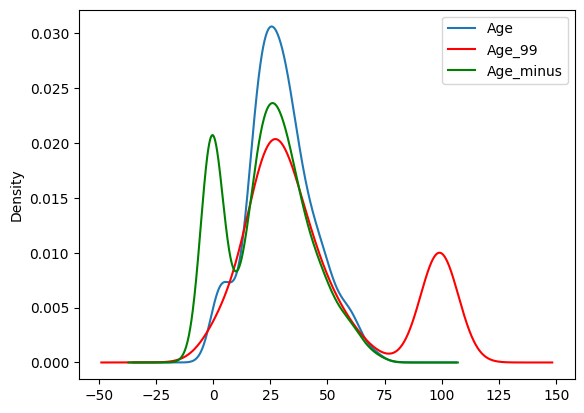

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_train['Age'].plot(kind='kde', ax=ax)
x_train['Age_99'].plot(kind='kde', ax=ax, color='red')
x_train['Age_minus'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

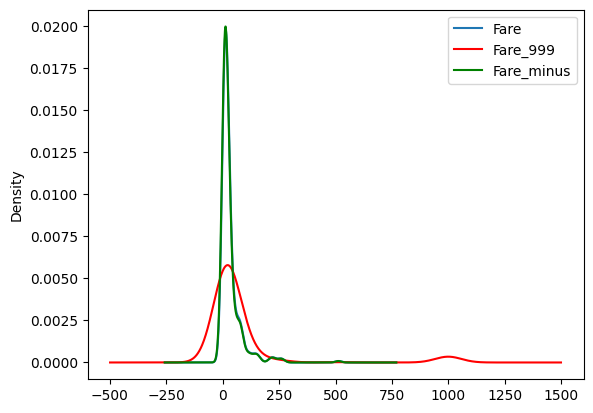

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_train['Fare'].plot(kind='kde', ax=ax)
x_train['Fare_999'].plot(kind='kde', ax=ax, color='red')
x_train['Fare_minus'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [12]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus,Fare_999,Fare_minus
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [13]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus,Fare_999,Fare_minus
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


**using sklearn**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [15]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [16]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [17]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [18]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [20]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [21]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [22]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])